In [7]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np


In [ ]:
email_data = pd.read_csv('http://www.minethatdata.com/Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv')

email_data.head(3)


In [ ]:
male_data = email_data[email_data['segment'] != 'Womens E-Mail']
male_data['treatment'] = male_data['segment'].map(lambda x: 1 if x == 'Mens E-Mail' else 0)
male_data['history_log'] = np.log(male_data['history'])
male_data['history_log_grp'] = np.round(male_data['history_log']/0.1)*0.1
male_data.head()

In [ ]:
male_data_groupby = male_data.groupby(['history_log_grp', 'segment'])['visit'].agg(['mean', 'count']).reset_index()
male_data_groupby = male_data_groupby.loc[male_data_groupby['count'] > 10]
male_data_groupby.head()

In [ ]:
import seaborn as sns

sns.scatterplot(
    data=male_data_groupby,
    x="history_log_grp",
    y="mean",
    hue="segment",
    size="count"
);

In [ ]:
threshold_value = 5.5

rdd_data = male_data.loc[
    ((male_data['history_log'] > threshold_value) & (male_data['segment'] == 'Mens E-Mail')) |
    ((male_data['history_log'] <= threshold_value) & (male_data['segment'] == 'No E-Mail'))
]


In [ ]:
rdd_data_groupby = rdd_data.groupby(['history_log_grp', 'segment'])['visit'].agg(['mean', 'count']).reset_index()
rdd_data_groupby = rdd_data_groupby.loc[rdd_data_groupby['count'] > 10]
rdd_data_groupby.head()


In [ ]:
import matplotlib.pyplot as plt

sns.scatterplot(
    data=rdd_data_groupby,
    x='history_log_grp',
    y='mean',
    hue='segment',
    size='count'
);

plt.grid()
plt.axvline([5.5], color='black', ls=':');


In [ ]:
rdd_data.groupby(['treatment'])['visit'].agg(['mean', 'count'])


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [ ]:
rdd_lm_reg = smf.ols(
    data=rdd_data,
    formula='visit ~ treatment + history_log'
).fit()

rdd_lm_reg.summary().tables[1]


In [ ]:
for i in range(4):
    poly_col_name = 'history_log' + '_' + str(i+1)
    interaction_col_name = 'treatment_' + 'history_log' + '_' + str(i+1)
    rdd_data[poly_col_name] = (rdd_data['history_log']-threshold_value)**(i+1)
    rdd_data[interaction_col_name] = rdd_data[poly_col_name] * rdd_data['treatment']
    

In [ ]:
nonlinear_rdd_ord4 = smf.ols(
    data=rdd_data,
    formula='''
        visit ~ treatment + history_log_1 + history_log_2 + history_log_3 + history_log_4 + 
                treatment_history_log_1 + treatment_history_log_2 + treatment_history_log_3 + treatment_history_log_4
    '''
).fit()

nonlinear_rdd_ord4.summary().tables[1]


,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0


In [9]:
male_data = email_data[email_data['segment'] != 'Womens E-Mail']
male_data['treatment'] = male_data['segment'].map(lambda x: 1 if x == 'Mens E-Mail' else 0)
male_data['history_log'] = np.log(male_data['history'])
male_data['history_log_grp'] = np.round(male_data['history_log']/0.1)*0.1
male_data.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,treatment,history_log,history_log_grp
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,0,5.796301,5.8
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,1,6.515942,6.5
8,9,5) $500 - $750,675.07,1,1,Rural,1,Phone,Mens E-Mail,0,0,0.0,1,6.514816,6.5
13,2,2) $100 - $200,101.64,0,1,Urban,0,Web,Mens E-Mail,1,0,0.0,1,4.621437,4.6
14,4,3) $200 - $350,241.42,0,1,Rural,1,Multichannel,No E-Mail,0,0,0.0,0,5.486538,5.5


In [10]:
male_data_groupby = male_data.groupby(['history_log_grp', 'segment'])['visit'].agg(['mean', 'count']).reset_index()
male_data_groupby = male_data_groupby.loc[male_data_groupby['count'] > 10]
male_data_groupby.head()

,history_log_grp,segment,mean,count
0,3.4,Mens E-Mail,0.146545,2750
1,3.4,No E-Mail,0.086988,2805
2,3.5,Mens E-Mail,0.169118,272
3,3.5,No E-Mail,0.084942,259
4,3.6,Mens E-Mail,0.158576,309


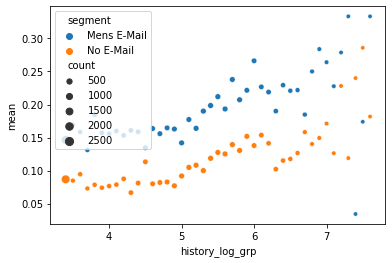

In [13]:
import seaborn as sns

sns.scatterplot(
    data=male_data_groupby,
    x="history_log_grp",
    y="mean",
    hue="segment",
    size="count"
);

In [14]:
threshold_value = 5.5

rdd_data = male_data.loc[
    ((male_data['history_log'] > threshold_value) & (male_data['segment'] == 'Mens E-Mail')) |
    ((male_data['history_log'] <= threshold_value) & (male_data['segment'] == 'No E-Mail'))
]


In [15]:
rdd_data_groupby = rdd_data.groupby(['history_log_grp', 'segment'])['visit'].agg(['mean', 'count']).reset_index()
rdd_data_groupby = rdd_data_groupby.loc[rdd_data_groupby['count'] > 10]
rdd_data_groupby.head()


,history_log_grp,segment,mean,count
0,3.4,No E-Mail,0.086988,2805
1,3.5,No E-Mail,0.084942,259
2,3.6,No E-Mail,0.094637,317
3,3.7,No E-Mail,0.073090,301
4,3.8,No E-Mail,0.078652,356


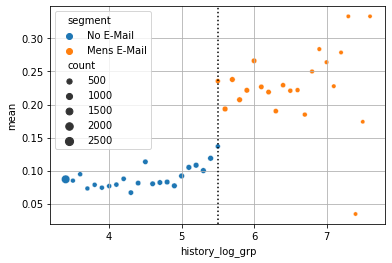

In [20]:
import matplotlib.pyplot as plt

sns.scatterplot(
    data=rdd_data_groupby,
    x='history_log_grp',
    y='mean',
    hue='segment',
    size='count'
);

plt.grid()
plt.axvline([5.5], color='black', ls=':');


In [21]:
rdd_data.groupby(['treatment'])['visit'].agg(['mean', 'count'])


,mean,count
treatment,,
0,0.090694,13926
1,0.224002,7366


In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [23]:
rdd_lm_reg = smf.ols(
    data=rdd_data,
    formula='visit ~ treatment + history_log'
).fit()

rdd_lm_reg.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0404,0.016,2.454,0.014,0.008,0.073
treatment,0.1137,0.008,14.240,0.000,0.098,0.129
history_log,0.0114,0.004,3.103,0.002,0.004,0.019


In [24]:
for i in range(4):
    poly_col_name = 'history_log' + '_' + str(i+1)
    interaction_col_name = 'treatment_' + 'history_log' + '_' + str(i+1)
    rdd_data[poly_col_name] = (rdd_data['history_log']-threshold_value)**(i+1)
    rdd_data[interaction_col_name] = rdd_data[poly_col_name] * rdd_data['treatment']
    

In [25]:
nonlinear_rdd_ord4 = smf.ols(
    data=rdd_data,
    formula='''
        visit ~ treatment + history_log_1 + history_log_2 + history_log_3 + history_log_4 + 
                treatment_history_log_1 + treatment_history_log_2 + treatment_history_log_3 + treatment_history_log_4
    '''
).fit()

nonlinear_rdd_ord4.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.1327,0.014,9.654,0.000,0.106,0.160
treatment,0.0741,0.020,3.774,0.000,0.036,0.113
history_log_1,0.1522,0.092,1.661,0.097,-0.027,0.332
history_log_2,0.1877,0.178,1.056,0.291,-0.161,0.536
history_log_3,0.1068,0.126,0.847,0.397,-0.140,0.354
history_log_4,0.0224,0.029,0.769,0.442,-0.035,0.079
treatment_history_log_1,-0.0406,0.135,-0.300,0.764,-0.306,0.225
treatment_history_log_2,-0.3928,0.271,-1.449,0.147,-0.924,0.139
treatment_history_log_3,0.0278,0.198,0.140,0.888,-0.360,0.415
treatment_history_log_4,-0.0484,0.047,-1.032,0.302,-0.140,0.044
